In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [2]:
red_df = pd.read_csv("./wine+quality/winequality-red.csv", sep=";")
white_df = pd.read_csv("./wine+quality/winequality-white.csv", sep=";")

In [3]:
red_df.to_csv("./data/winequality-red_2.csv", index=False)
white_df.to_csv("./data/winequality-white_2.csv", index=False)

In [4]:
red_df = pd.read_csv("./data/winequality-red_2.csv")
white_df = pd.read_csv("./data/winequality-white_2.csv")

In [5]:
red_df.insert(0, column="type", value="red")
white_df.insert(0, column="type", value="white")

In [6]:
wine = pd.concat([red_df, white_df])
wine.to_csv("./data/wine.csv", index=False)

In [7]:
wine = pd.read_csv("./data/wine.csv")
wine.columns = wine.columns.str.replace(" ", "_")
wine

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [8]:
wine.isnull().sum()

type                    0
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [10]:
print(sorted(wine.quality.unique()))
print(wine["quality"].value_counts(ascending=True))

[3, 4, 5, 6, 7, 8, 9]
quality
9       5
3      30
8     193
4     216
7    1079
5    2138
6    2836
Name: count, dtype: int64


In [11]:
wine.groupby("type")["quality"].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [12]:
wine.groupby("type")["quality"].median()

type
red      6.0
white    6.0
Name: quality, dtype: float64

In [13]:
wine.groupby('type').agg({'quality':['sum', 'mean'], 'alcohol':['std','median']})

quality             alcohol       
          sum      mean       std median
type                                    
red      9012  5.636023  1.065668   10.2
white   28790  5.877909  1.230621   10.4

In [14]:
! pip install statsmodels

In [15]:
from scipy import stats # t검정을 위한 라이브러리
from statsmodels.formula.api import ols, glm    # 회귀분석 라이브러리

In [16]:
red_wine_quality = wine.loc[wine["type"]=="red", "quality"]
white_wine_quality = wine.loc[wine["type"]=="white", "quality"]

In [17]:
stats.ttest_ind(red_wine_quality, white_wine_quality, equal_var=False)

TtestResult(statistic=-10.149363059143164, pvalue=8.168348870049682e-24, df=2950.750452166697)

In [18]:
Rformula = 'quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol'

regression_result = ols(Rformula, data=wine).fit()

In [20]:
regression_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Fri, 23 May 2025   Prob (F-statistic):               0.00
Time:                        09:37:34   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627     11.894      4.688      0.000      32.447      79.079
fixed_acidity            0.0677      0.016      4.346      0.000       0.037       0.098
volatile_acidity        -1.3279      0.077    -17.162      0.000      -1.480      -1.176
citric_acid             -0.1097      0.080     -1.377      0.168      -0.266       0.046
residual_sugar           0.0436      0.005      8.449      0.000       0.033       0.054
chlorides               -0.4837      0.333     -1.454      0.146      -1.136       0.168
free_sulfur_dioxide      0.0060      0.001      7.948      0.000       0.004       0.007
total_sulfur_dioxide    -0.0025      0.000     -8.969      0.000      -0.003      -0.002
density                -54.9669     12.137     -4.529      0.000     -78.760     -31.173
pH                       0.4393      0.090      4.861      0.000       0.262       0.616
sulphates                0.7683      0.076     10.092      0.000       0.619       0.917
alcohol                  0.2670      0.017     15.963      0.000       0.234       0.300
==============================================================================
Omnibus:                      144.075   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.712
Skew:                          -0.006   Prob(JB):                     3.09e-71
Kurtosis:                       4.095   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
sample = wine[wine.columns.difference(["quality", "type"])]    # 퀄리티랑 타입을 제외한 샘플 데이터 열만 취합
sample1 = sample.head(5)
sample2 = sample.tail(5)


In [62]:
predict1 = regression_result.predict(sample1)
predict2 = regression_result.predict(sample2)
print(predict1)
print(predict2)

0    4.997607
1    4.924993
2    5.034663
3    5.680333
4    4.997607
dtype: float64
6492    6.168984
6493    5.608278
6494    5.419361
6495    6.432656
6496    6.205727
dtype: float64


In [68]:
print(wine[:5]["quality"])
print(wine[-5:]["quality"])

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64
6492    6
6493    5
6494    6
6495    7
6496    6
Name: quality, dtype: int64


In [73]:
data = {
    "fixed_acidity" : [8.5, 8.1], 
    "volatile_acidity":[0.8, 0.5], 
    "citric_acid":[0.3, 0.4], 
    "residual_sugar":[6.1, 5.8], 
    "chlorides":[0.055, 0.04], 
    "free_sulfur_dioxide":[30.0, 31.0], 
    "total_sulfur_dioxide":[98.0, 99], 
    "density":[0.996, 0.91], 
    "pH":[3.25, 3.01], 
    "sulphates":[0.4, 0.35], 
    "alcohol":[9.0, 0.88]
}
sample3 = pd.DataFrame(data, columns=sample.columns)
sample3

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,9.00,0.055,0.3,0.996,8.5,30.0,3.25,6.1,0.40,98.0,0.8
1,0.88,0.040,0.4,0.910,8.1,31.0,3.01,5.8,0.35,99.0,0.5


In [75]:
predict3 = regression_result.predict(sample3)
predict3

0    4.809094
1    7.582129
dtype: float64

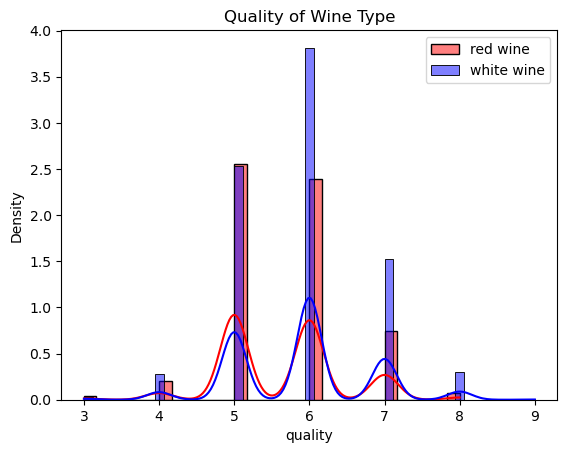

In [80]:
sns.histplot(red_wine_quality, stat="density", kde=True, color="red", label="red wine")
sns.histplot(white_wine_quality, stat="density", kde=True, color="blue", label="white wine")
plt.title("Quality of Wine Type")
plt.legend()

(<Figure size 640x480 with 1 Axes>,
 (array([-0.0614815 , -0.02284876, -0.14904951, ..., -0.63960939,
         -0.27128396, -0.13872942]),
  array([ 0.02363191,  0.08667536, -0.04281161, ...,  0.55410286,
          0.5178791 , -0.2565605 ])))

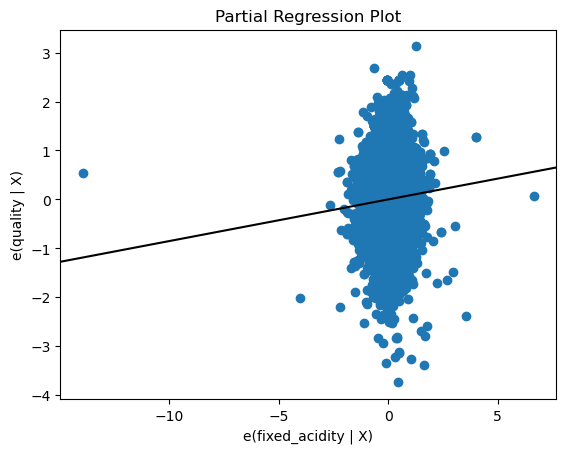

In [85]:
import statsmodels.api as sm

others = list(set(wine.columns).difference(set(["quality", "fixed_acidity"])))
sm.graphics.plot_partregress("quality", "fixed_acidity", others, data=wine, ret_coords=True, obs_labels=False)

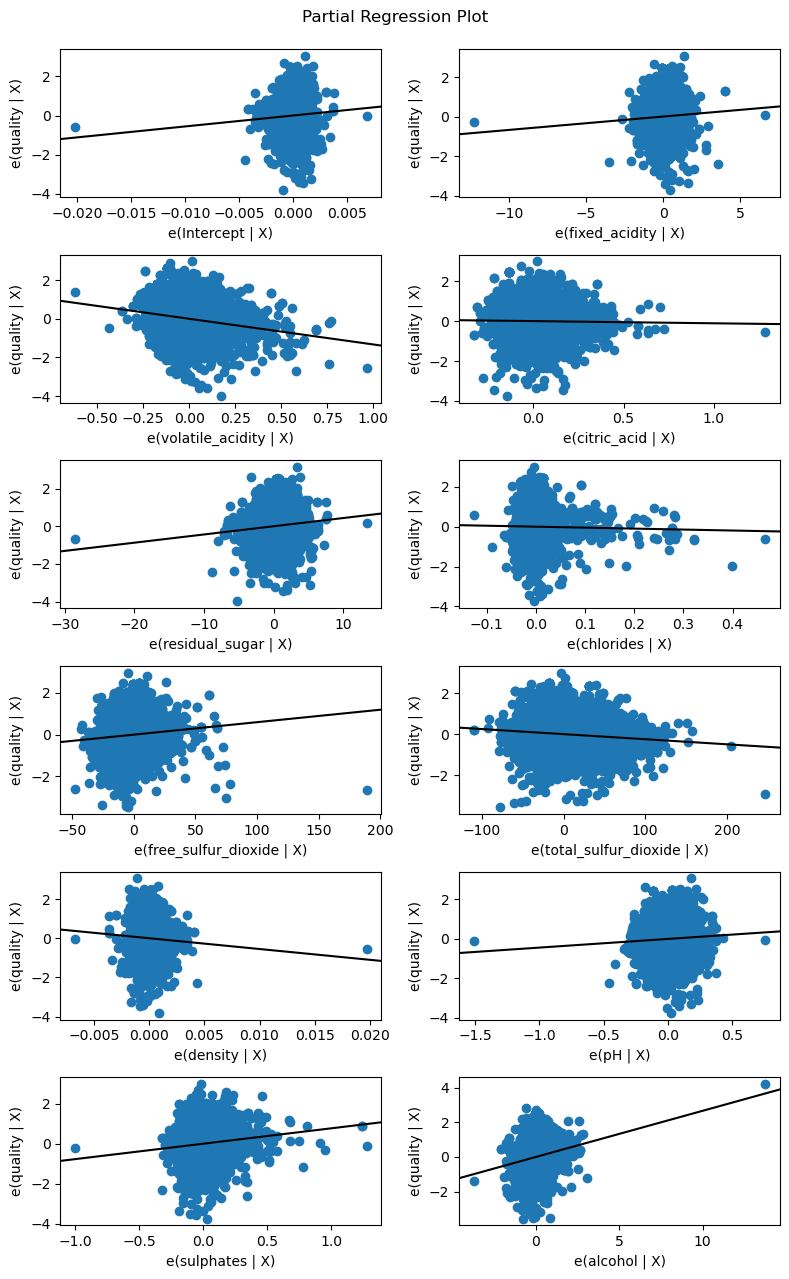

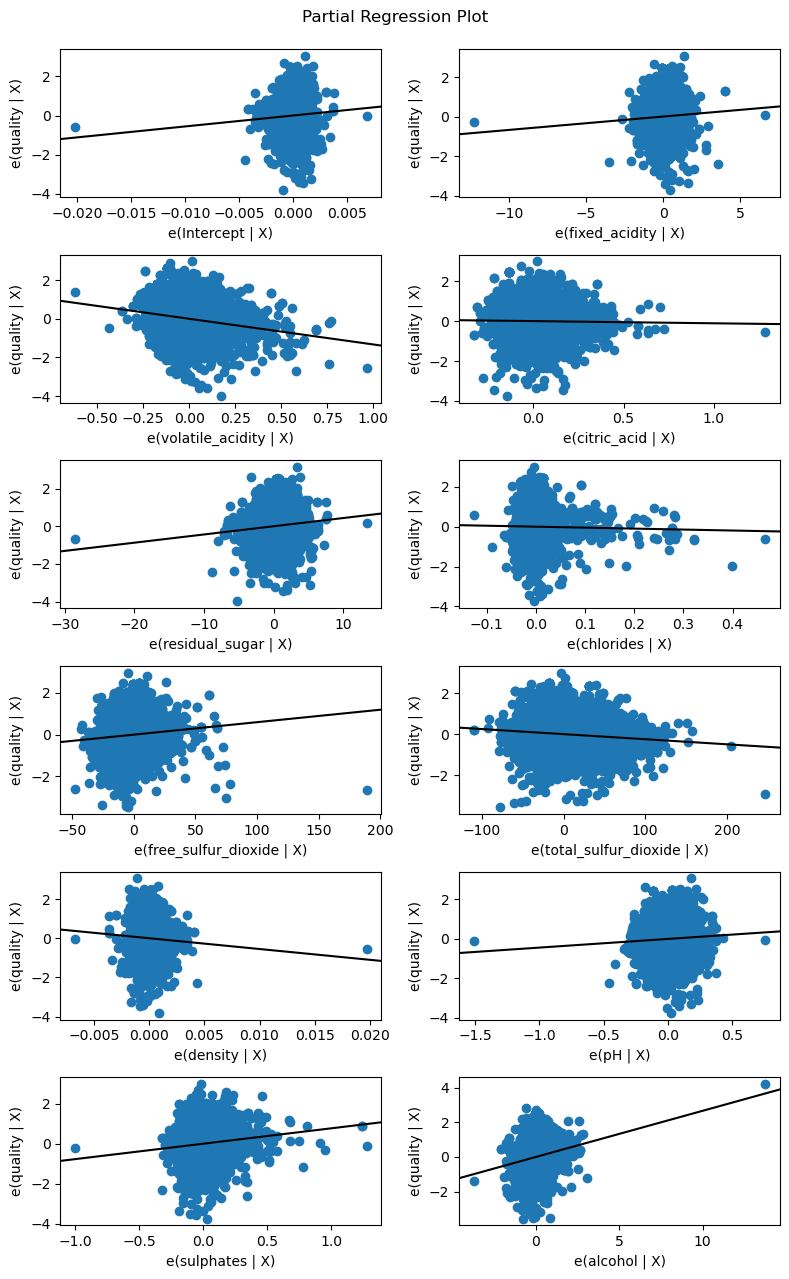

In [86]:
fig = plt.figure(figsize=(8, 13))
sm.graphics.plot_partregress_grid(regression_result, fig=fig)